In [ ]:
# from keras.utils import to_categorical
# from keras_preprocessing.image import load_img
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# import os
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder

# TRAIN_DIR = 'images/train'
# TEST_DIR = 'images/test'

# def createdataframe(dir):
#     image_paths = []
#     labels = []
#     for label in os.listdir(dir):
#         for imagename in os.listdir(os.path.join(dir,label)):
#             image_paths.append(os.path.join(dir,label,imagename))
#             labels.append(label)
#         print(label, "completed")
#     print("Dataframe created")
#     return image_paths,labels

# train = pd.DataFrame()
# train['image'], train['label'] = createdataframe(TRAIN_DIR)
# print(train.head())


# test = pd.DataFrame()
# test['image'], test['label'] = createdataframe(TEST_DIR)
# print(test.head())

# from tqdm.notebook import tqdm

# def extract_features(images):
#     features = []
#     for image in tqdm(images):
#         img = load_img(image,grayscale =  True )
#         img = np.array(img)
#         features.append(img)
#     features = np.array(features)
#     features = features.reshape(len(features),48,48,1)
#     return features

# train_features = extract_features(train['image'])
# test_features = extract_features(test['image'])


# x_train = train_features/255.0
# x_test = test_features/255.0

# le = LabelEncoder()
# le.fit(train['label'])

# y_train = le.transform(train['label'])
# y_test = le.transform(test['label'])


# y_train = to_categorical(y_train,num_classes = 7)
# y_test = to_categorical(y_test,num_classes = 7)

# model = Sequential()
# # convolutional layers
# model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# # fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# # output layer
# model.add(Dense(7, activation='softmax'))

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
# model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))



# # app.py
# import cv2
# from keras.models import model_from_json
# import numpy as np
# # from keras_preprocessing.image import load_img
# json_file = open("facialemotionmodel.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(model_json)

# model.load_weights("facialemotionmodel.h5")
# haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
# face_cascade=cv2.CascadeClassifier(haar_file)

# def extract_features(image):
#     feature = np.array(image)
#     feature = feature.reshape(1,48,48,1)
#     return feature/255.0

# webcam=cv2.VideoCapture(0)
# labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
# while True:
#     i,im=webcam.read()
#     gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#     faces=face_cascade.detectMultiScale(im,1.3,5)
#     try: 
#         for (p,q,r,s) in faces:
#             image = gray[q:q+s,p:p+r]
#             cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
#             image = cv2.resize(image,(48,48))
#             img = extract_features(image)
#             pred = model.predict(img)
#             prediction_label = labels[pred.argmax()]
#             # print("Predicted Output:", prediction_label)
#             # cv2.putText(im,prediction_label)
#             cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
#         cv2.imshow("Output",im)
#         cv2.waitKey(27)
#     except cv2.error:
#         pass

Import Libraries

In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

Import training and testing datasets

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

Create Dataframe(Train and Test)

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    print("Dataframe created")
    return image_paths,labels

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train.head())

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
Dataframe created
                          image  label
0      images/train\angry\0.jpg  angry
1      images/train\angry\1.jpg  angry
2     images/train\angry\10.jpg  angry
3  images/train\angry\10002.jpg  angry
4  images/train\angry\10016.jpg  angry


In [4]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test.head())

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
Dataframe created
                         image  label
0  images/test\angry\10052.jpg  angry
1  images/test\angry\10065.jpg  angry
2  images/test\angry\10079.jpg  angry
3  images/test\angry\10095.jpg  angry
4  images/test\angry\10121.jpg  angry


In [5]:
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\TahlilMahfuz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

In [6]:
x_train = train_features/255.0
x_test = test_features/255.0

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [9]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [10]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [33]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 254s 1s/step - loss: 1.8249 - accuracy: 0.2430 - val_loss: 1.8076 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 251s 1s/step - loss: 1.7863 - accuracy: 0.2564 - val_loss: 1.7026 - val_accuracy: 0.3043
Epoch 3/100
226/226 [==============================] - 250s 1s/step - loss: 1.6780 - accuracy: 0.3236 - val_loss: 1.5553 - val_accuracy: 0.3806
Epoch 4/100
226/226 [==============================] - 251s 1s/step - loss: 1.5509 - accuracy: 0.3917 - val_loss: 1.3932 - val_accuracy: 0.4672
Epoch 5/100
226/226 [==============================] - 250s 1s/step - loss: 1.4596 - accuracy: 0.4351 - val_loss: 1.3506 - val_accuracy: 0.4806
Epoch 6/100
226/226 [==============================] - 251s 1s/step - loss: 1.4169 - accuracy: 0.4493 - val_loss: 1.3062 - val_accuracy: 0.4891
Epoch 7/100
226/226 [==============================] - 250s 1s/step - loss: 1.3702 - accuracy: 0.4770 - val_loss: 1.2473 - val_accuracy:

In [1]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

NameError: name 'model' is not defined

In [11]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

label = ['angry','disgust','fear','happy','neutral','sad','surprise']


def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

original image is of happy
1/1 [==============================] - 0s 34ms/step
model prediction is  happy


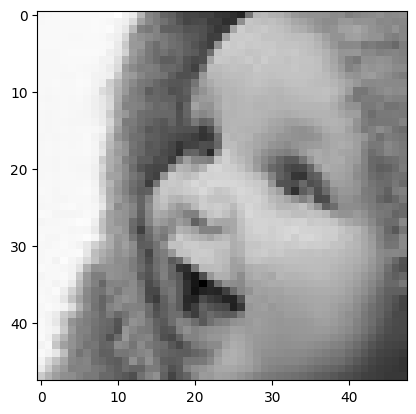

In [14]:
image = 'images/train/happy/64.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Generate ROC and AUC Curves for facial emotion detection model

In [23]:
from sklearn.metrics import roc_curve, auc

221/221 [==============================] - 9s 41ms/step


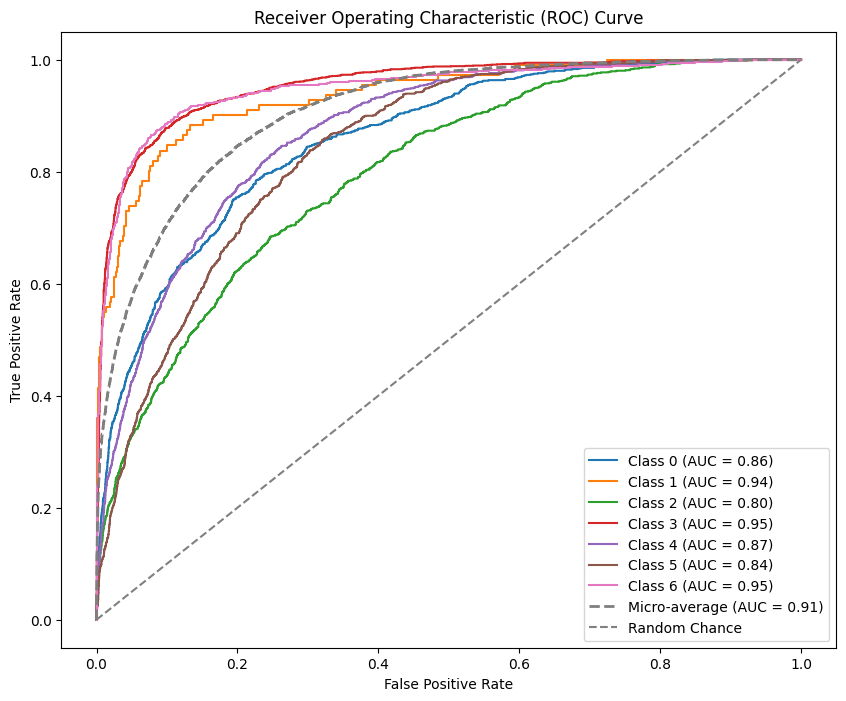

In [24]:
y_score = model.predict(x_test)

y_true = np.argmax(y_test, axis=1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 8))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()


221/221 [==============================] - 9s 41ms/step


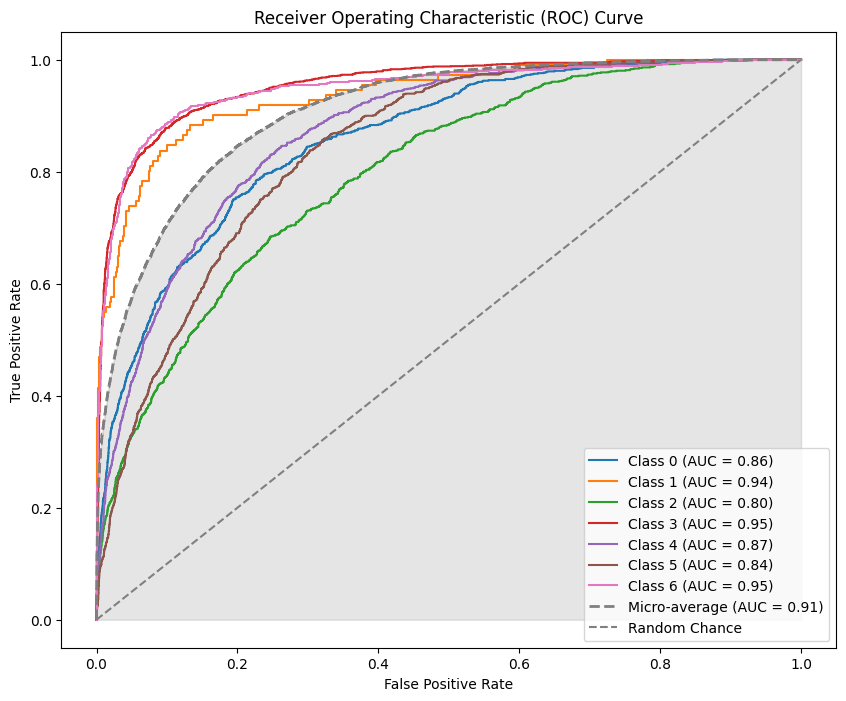

In [25]:
y_score = model.predict(x_test)

y_true = np.argmax(y_test, axis=1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):  
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 8))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

plt.fill_between(fpr["micro"], tpr["micro"], color='gray', alpha=0.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()
